Import Package/Library

In [79]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import re
from textblob import TextBlob

Download necessary NLTK resources

In [80]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import and Read text file

In [81]:
file_path = 'story_snowhite.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()
    Processes_text = text.replace("â€™", "'")

Creat and Display Wordcloud 

In [82]:
def preprocess_text(Processes_text):
    Processes_text = re.sub(r'[^\w\s]', '', text)  # Menghapus tanda baca
    Processes_text = Processes_text.lower()  # Mengubah huruf menjadi lowercase
    return Processes_text
Processes_text = preprocess_text(Processes_text)

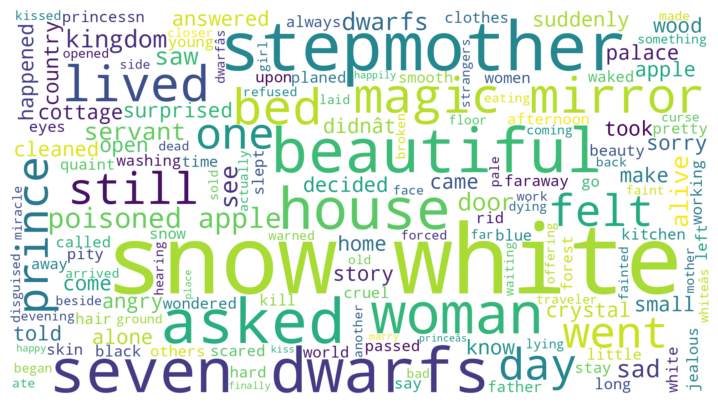

In [83]:
def create_wordcloud(text):
    wordcloud = WordCloud(width=1960, height=1080, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_wordcloud(Processes_text)

Display Frequent Word

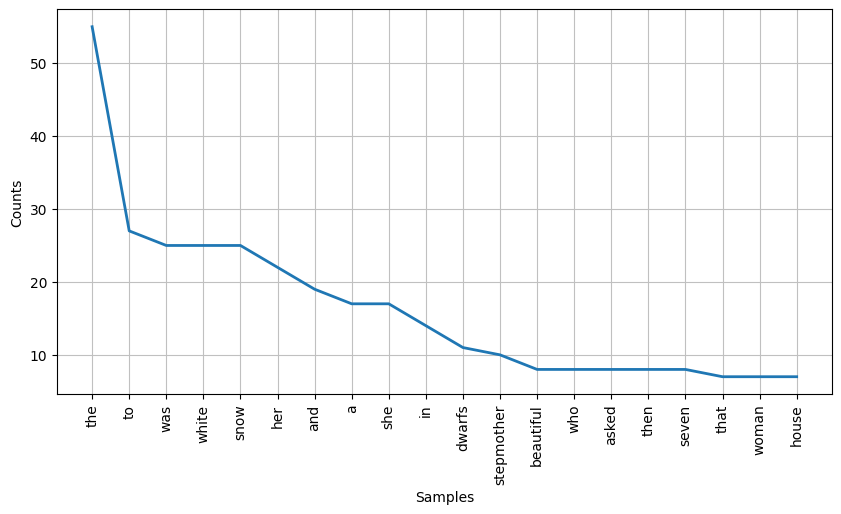

In [84]:
def create_barplot(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    plt.figure(figsize=(10, 5))
    fdist.plot(20, cumulative=False)
    plt.show()

create_barplot(Processes_text)

Sentiment feel Plot

In [85]:
def get_sentence_polarity(sentence):
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
sentiment_scores = [get_sentence_polarity(sentence) for sentence in sentences]

Display Sentiment Feel Plot

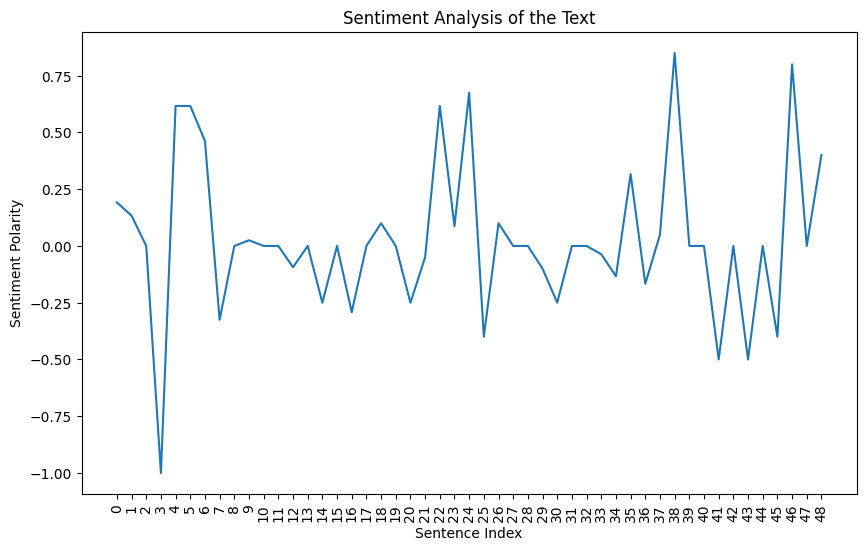

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(sentiment_scores)
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis of the Text')
plt.xticks(range(len(sentences)), rotation=90)
plt.show()

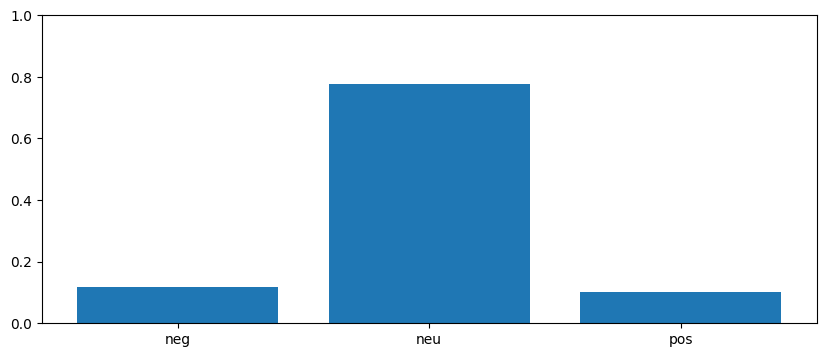

Sentimen negatif: 0.119
Sentimen netral: 0.778
Sentimen positif: 0.103


In [87]:
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_scores.pop('compound')
    
    plt.figure(figsize=(10, 4))
    plt.bar(sentiment_scores.keys(), sentiment_scores.values())
    plt.ylim(0, 1)
    plt.show()
    
    for sentiment, score in sentiment_scores.items():
        if sentiment == 'neg':
            print("Sentimen negatif:", score)
        elif sentiment == 'neu':
            print("Sentimen netral:", score)
        elif sentiment == 'pos':
            print("Sentimen positif:", score)

analyze_sentiment(text)